Ví dụ 1:

Import các thư viện cần thiết

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

Khởi tạo dữ liệu: X - là số giờ học, y - là nhãn (0 - trượt, 1 - qua)

In [2]:
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In dữ liệu

In [15]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

In [12]:
print(X0)

[0.5  0.75 1.   1.25 1.5  1.75 2.   2.5  3.   3.5 ]


In [13]:
print(y0)

[0 0 0 0 0 0 0 0 0 0]


In [16]:
print(X1)

[1.75 2.25 2.75 3.25 4.   4.25 4.5  4.75 5.   5.5 ]


In [17]:
print(y1)

[1 1 1 1 1 1 1 1 1 1]


Vẽ biểu đồ để hình dung dữ liệu

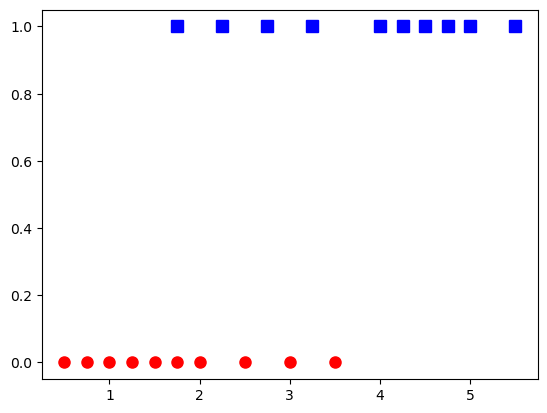

In [4]:
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

Xây dựng các phương thức cần cho mô hình Hồi quy Logistic: 

In [6]:
# Evaluate g(z)
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    # method to calculate model logistic regression by Stochastic Gradient Descent method
    # eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
    # shuffle the order of data (for stochastic gradient descent).
    # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In ra kết quả (bộ hệ số w)

In [32]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.10770097]
 [ 1.55781793]]


In ra xác suất rơi vào lớp 1 của các phần tử dữ liệu trong tập training

In [8]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


In ra kết quả trực quan

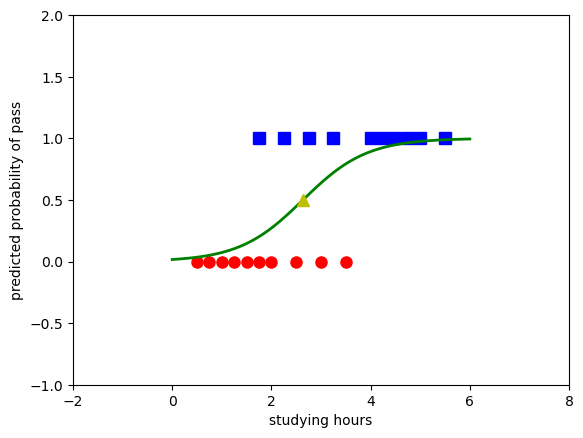

In [9]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

Tạo dữ liệu test

In [29]:
x_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]]).T
print(x_test)

[[2.45]
 [1.85]
 [3.75]
 [3.21]
 [4.05]]


Định nghĩa hàm logistic

In [34]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

Thêm 1 cột toàn số vào dữ liệu test

In [36]:
x_test_with_intercept = np.hstack([np.ones((x_test.shape[0], 1)), x_test])
print(x_test_with_intercept)

[[1.   2.45]
 [1.   1.85]
 [1.   3.75]
 [1.   3.21]
 [1.   4.05]]


In [39]:
linear_combination = np.dot(x_test_with_intercept, w[-1])
print(linear_combination)

[[-0.29104704]
 [-1.2257378 ]
 [ 1.73411627]
 [ 0.89289459]
 [ 2.20146165]]


Dự đoán xác suất cho dữ liệu test

In [40]:
probabilities = logistic_function(linear_combination)
print(probabilities)

[[0.42774755]
 [0.22692828]
 [0.84993818]
 [0.70948715]
 [0.90038069]]


Dự đoán kết quả thi của sinh viên

In [41]:
predictions = (probabilities >= 0.5).astype(int)
print(predictions)

[[0]
 [0]
 [1]
 [1]
 [1]]
